<a href="https://colab.research.google.com/github/NoManNayeem/CIND119Project_2021-2022/blob/main/CMTH_642_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 2


Assignment 2 is worth 15% of the final grade. Submit the ipynb file and a generated output file (PDF or HTML). Failing to submit both files will be subject to a mark deduction.

Your output file should include all the tables, plots, and requested figures/values.

Printing the lengthy outputs (e.g., the whole data frame or a list with more than 100 elements) will have a deduction of 5 points. Instead, please use head() or tail() to have a neat output.

If you preprocess the data in a question, you should continue with the same dataset in the following questions unless otherwise mentioned.


### Preparation:

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


In [21]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_wine_data = pd.read_csv(url,sep=';',header=0)

# Check the first five records
print(red_wine_data.head())
# num_columns = red_wine_data.shape[1]
# print("Number of columns in red_wine:", num_columns)




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [22]:
import pandas as pd
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_wine_data = pd.read_csv(url1,sep=';',header=0)

# Check the first five records
print(white_wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [23]:
# Concatenate the DataFrames vertically (axis=0)
wine_data_all = pd.concat([red_wine_data, white_wine_data], axis=0)

wine_data_all.reset_index(drop=True, inplace=True)

# num_columns = wine_data_all.shape[1]
# print("Number of columns in wine_data_all:", num_columns)

# Display the result
print(wine_data_all.head())
print(wine_data_all.tail())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Question 2
Check the data types of the attributes. (2 points)

In [24]:
# Display the data types of attributes in the wine_data_all DataFrame
print(wine_data_all.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### Question 3
Are there any missing values in the dataset? How many? You should not print the whole dataset. (2 points)

In [25]:
# Check for missing values in the wine_data_all DataFrame and count them
missing_values = wine_data_all.isnull().sum()

# Display the count of missing values for each column
print(missing_values)
#Missing Value is 0

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Question 4
What is the correlation between the attributes other than Quality? (8 points)

In [26]:
#Assuming "quality" is the column not to consider
attributes_except_quality = wine_data_all.drop(columns=["quality"],axis=1)

# Calculate the correlation matrix
correlation_matrix = attributes_except_quality.corr()

# Display the correlation matrix
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidit

### Question 5
Plot the frequency distribution of wine quality by using the Quality attribute. (8 points)

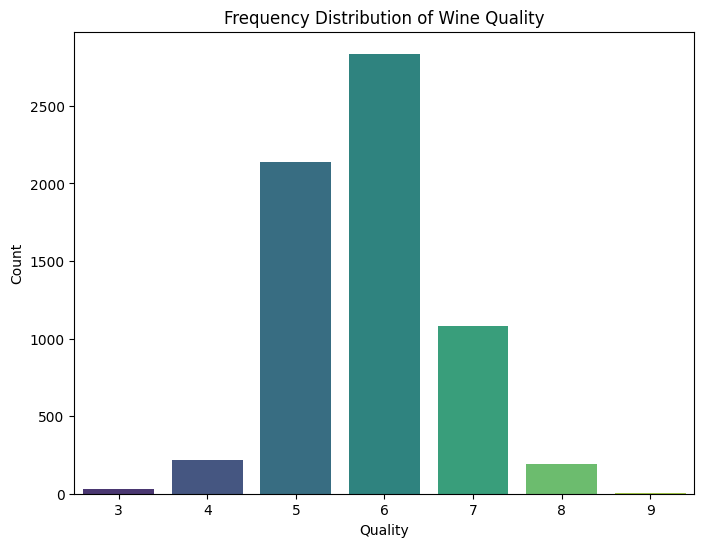

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the frequency distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data_all, palette='viridis')  # Use 'viridis' for a nice color palette
plt.title('Frequency Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

# Show the plot
plt.show()

### Question 6
Reduce the levels of rating for quality to three levels, i.e., high(2), medium(1), and low(0). Assign the levels 3 and 4 to level 0; 5 and 6 to level 1; and 7, 8, and 9 to level 2. You can use either “high, medium, low” or equivalent numbers. (10 points)

In [28]:

# Define the mapping for quality levels
quality_mapping = {3: "low", 4: "low", 5: "medium", 6: "medium", 7: "high", 8: "high", 9: "high"}

# Create a new column 'quality_label' based on the mapping
wine_data_all['quality_label'] = wine_data_all['quality'].map(quality_mapping)

# Display the updated DataFrame
print(wine_data_all[['quality', 'quality_label']].head())
print(wine_data_all[['quality', 'quality_label']].tail())


   quality quality_label
0        5        medium
1        5        medium
2        5        medium
3        6        medium
4        5        medium
      quality quality_label
6492        6        medium
6493        5        medium
6494        6        medium
6495        7          high
6496        6        medium


### Question 7
Normalize the numeric attributes. Hint: (x - min(x)) / (max(x) - min(x)) (10 points)

In [29]:

# Extracting numeric columns for normalization
numeric_columns = wine_data_all.select_dtypes(include=['float64', 'int64']).columns

# Normalize numeric columns
wine_data_all[numeric_columns] = (wine_data_all[numeric_columns] - wine_data_all[numeric_columns].min()) / (wine_data_all[numeric_columns].max() - wine_data_all[numeric_columns].min())

# Display the updated DataFrame
print(wine_data_all[numeric_columns].head())
print(wine_data_all[numeric_columns].tail())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  
0  0.202899  0.333333  
1  0.260

### Question 8
Divide the dataset to training and test sets. (10 points)

In [30]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = wine_data_all.drop('quality_label', axis=1)  # Features
y = wine_data_all['quality_label']  # Target variable

# Split the data into training and test sets (80% training, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Display the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4872, 12)
X_test shape: (1625, 12)
y_train shape: (4872,)
y_test shape: (1625,)


### Question 9
Use the Logistic Regression algorithm to predict the quality of wine using its attributes. (12 points)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the features (optional but can be beneficial for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_logistic_regression = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic_regression)
classification_report_result = classification_report(y_test, y_pred_logistic_regression)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       303
         low       1.00      1.00      1.00        66
      medium       1.00      1.00      1.00      1256

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Question 10
Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Fit the model on the training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
classification_report_result = classification_report(y_test, y_pred_knn)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)


Accuracy: 0.9655384615384616

Classification Report:
               precision    recall  f1-score   support

        high       0.98      0.94      0.96       303
         low       1.00      0.50      0.67        66
      medium       0.96      1.00      0.98      1256

    accuracy                           0.97      1625
   macro avg       0.98      0.81      0.87      1625
weighted avg       0.97      0.97      0.96      1625



### Question 11
Display two confusion matrices to evaluate the performances of Logistic Regression and KNN. (A simple matrix is enough. No need to plot it.) (12 points)

In [33]:
from sklearn.metrics import confusion_matrix

# Logistic Regression
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

# KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic_regression)

print("\nConfusion Matrix for KNN:")
print(conf_matrix_knn)

Confusion Matrix for Logistic Regression:
[[ 303    0    0]
 [   0   66    0]
 [   0    0 1256]]

Confusion Matrix for KNN:
[[ 285    0   18]
 [   0   33   33]
 [   5    0 1251]]


### Question 12
Evaluate the models’ performances by computing Accuracy, Precision, and Recall. If you are using a package to calculate the values, you should explain what you understand from the output of the package by mentioning the exact accuracy, precision, and recall values in your own words. (12 points)


In [34]:

# Logistic Regression
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)

# KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Display accuracy
print("Accuracy for Logistic Regression:", accuracy_logistic_regression)
print("Accuracy for KNN:", accuracy_knn)


Accuracy for Logistic Regression: 1.0
Accuracy for KNN: 0.9655384615384616


In [35]:
# from sklearn.metrics import precision_score

# # Logistic Regression
# precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression, average='weighted')

# # KNN
# precision_knn = precision_score(y_test, y_pred_knn, average='weighted')

# # Display precision
# print("Precision for Logistic Regression:", precision_logistic_regression)
# print("Precision for KNN:", precision_knn)
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Logistic Regression
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression, average='weighted')
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression, average='weighted')

# KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Display accuracy, precision, and recall
print("Logistic Regression - Accuracy:", accuracy_logistic_regression,
      " Precision:", precision_logistic_regression,
      " Recall:", recall_logistic_regression)

print("KNN - Accuracy:", accuracy_knn,
      " Precision:", precision_knn,
      " Recall:", recall_knn)


Logistic Regression - Accuracy: 1.0  Precision: 1.0  Recall: 1.0
KNN - Accuracy: 0.9655384615384616  Precision: 0.9665093571611926  Recall: 0.9655384615384616


In [36]:
# from sklearn.metrics import recall_score

# # Logistic Regression
# recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression, average='weighted')

# # KNN
# recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# # Display recall
# print("Recall for Logistic Regression:", recall_logistic_regression)
# print("Recall for KNN:", recall_knn)


This is the end of Assignment 2

Ceni Babaoglu, PhD